# Developed by:Manan Tyagi
#moontyagi786@gmail.com

# The mobile games industry is worth billions of dollars, with companies spending vast amounts of money on the development and marketing of these games to an equally large market. Using this data set, insights can be gained into a sub-market of this market, strategy games. This sub-market includes titles such as Clash of Clans, Plants vs Zombies and Pokemon GO.


# My works on this project:

In [44]:
'''importing basic modules'''
import pandas as pd
import numpy as np
from scipy import stats
'''for custom visualization of data '''
import matplotlib.pyplot as plt
import seaborn as sns
'''None/missing values visualization'''
'''for making date strigs to make datetime objects'''
import datetime
''' Reading data from csv file'''
sub=pd.read_csv('manan.csv',header=None)
'''Now we replace header with top row'''
sub.columns=sub.iloc[0]
''' Now removing topmost row generated due to replacment '''
sub=sub[1:] #slicing
display(sub.head(5))
print("Dimension of Data:",sub.shape)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
1,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4,3553,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
2,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
3,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3,8376,0,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
4,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394,0,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
5,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


Dimension of Data: (17007, 18)


In [6]:
print("Null values in fields are")
sub.isnull().sum()

Null values in fields are


0
URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [36]:
ssub=sub.copy()

#drop columns

ssub=ssub.drop(columns="Developer")
ssub=ssub.drop(columns="URL")
ssub.columns= ['ID', 'Name','Subtitle','Icon URL','User_Rating','User_Rating_Count','Price','In_App_Purchase','Desc','Age_Rating','Languages','Size','Primary_Genre','Genre','Release_Date','Current_Version_Date']

'''droping none values in user rating column'''
ssub=ssub[pd.notnull(ssub['User_Rating'])]

#making datetime objects
ssub["Release_Date"]=pd.to_datetime(ssub["Release_Date"])
ssub["Current_Version_Date"]=pd.to_datetime(ssub["Current_Version_Date"])

#adding new column for time gap between release date and current version date
ssub['update_Gap']=ssub.Current_Version_Date-ssub.Release_Date
#To make unbiased condition we are dropping which have time gap less than 6 months and rating count less than
#200
ssub[['User_Rating_Count', 'update_Gap']] = ssub[['User_Rating_Count', 'update_Gap']].apply(pd.to_numeric) 
ssub.drop(ssub[ssub['User_Rating_Count']<200].index,inplace=True)
ssub.drop(ssub[ssub['update_Gap']<175].index,inplace=True)

In [39]:
ss = ssub.copy()
#this is to remove entertainment and game tag in genre because this contains only games and wtf we
#we do with game i.e entertainment and also for plotting various graphs 
ss['Genre'] = ss['Genre'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
ss['Genre'] = ss['Genre'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
ss['Genre']= ss['Genre'].str.strip()
Non_Main_Genre=ss[~ss.Genre.str.contains('Puzzle') & \
                           ~ss.Genre.str.contains('Action') & \
                           ~ss.Genre.str.contains('Family')& \
                           ~ss.Genre.str.contains('Education')& \
                           ~ss.Genre.str.contains('Family')& \
                           ~ss.Genre.str.contains('Adventure')&\
                           ~ss.Genre.str.contains('Board')&\
                           ~ss.Genre.str.contains('Role')].index
ss.drop(Non_Main_Genre , inplace=True)
ss.loc[ss['Genre'].str.contains('Puzzle'),'Genre'] = 'Puzzle'
ss.loc[ss['Genre'].str.contains('Board'),'Genre'] = 'Puzzle'
ss.loc[ss['Genre'].str.contains('Action'),'Genre'] = 'Action'
ss.loc[ss['Genre'].str.contains('Adventure'),'Genre'] = 'Adventure'
ss.loc[ss['Genre'].str.contains('Role'),'Genre'] = 'Adventure'
ss.loc[ss['Genre'].str.contains('Family'),'Genre'] = 'Family'
ss.loc[ss['Genre'].str.contains('Education'),'Genre'] = 'Family'

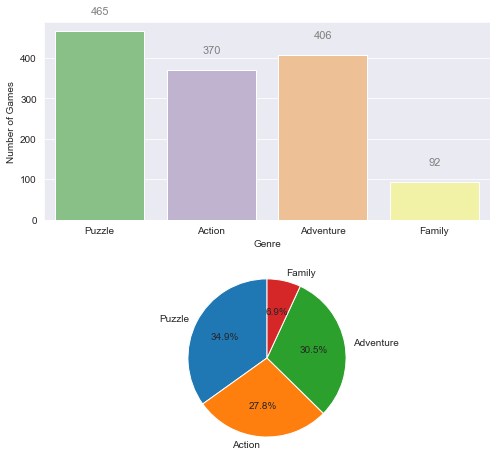

In [43]:
sns.set_style('darkgrid')
f, axes = plt.subplots (2,1, figsize=(8,8))

#Histogram
x=['Puzzle','Action','Adventure','Family']
y = [ss.Genre[(ss['Genre']=='Puzzle')].count(),ss.Genre[(ss['Genre']=='Action')].count(),
     ss.Genre[(ss['Genre']=='Adventure')].count(),ss.Genre[(ss['Genre']=='Family')].count()]

vis1= sns.barplot(x,y,palette='Accent',ax=axes[0])
vis1.set(xlabel='Genre',ylabel='Number of Games')
for p in vis1.patches:
             vis1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')


#Pie Chart
NG = [ss.Genre[(ss['Genre']=='Puzzle')].count(),ss.Genre[(ss['Genre']=='Action')].count(),\
     ss.Genre[(ss['Genre']=='Adventure')].count(),ss.Genre[(ss['Genre']=='Family')].count()]
G = ['Puzzle','Action','Adventure','Family']

plt.pie(NG, labels=G, startangle=90, autopct='%.1f%%')
plt.show()


plt.ioff()

# Most reviewed Genre 


In [48]:
sor=sub.sort_values(by='User Rating Count',ascending=False)[['Name','User Rating Count', 'Average User Rating','Genres', 'User Rating Count', ]].head(8)
sor.iloc[:, 0:-1]

,Name,User Rating Count,Average User Rating,Genres
353,Domino for iPhone,997,4,"Games, Strategy, Board, Entertainment"
2223,"""Arizona Rose and the Pirates' Riddles HD""",994,5,"Games, Puzzle, Education, Strategy"
2654,Forge of Empires: Build a City,99221,4.5,"Games, Simulation, Strategy, Entertainment"
7184,Zombidle,992,4.5,"Games, Role Playing, Strategy"
8288,Trump Tycoon : Politics Game,992,4.5,"Games, Strategy, Entertainment, Role Playing"
10545,Pro 11 - Soccer Manager Game,991,4.5,"Games, Sports, Sports, Strategy"
248,Worms 2: Armageddon,9908,4.5,"Games, Entertainment, Action, Strategy"
4675,Battlevoid: First Contact,99,4,"Games, Simulation, Strategy"


In [71]:
sor=sub.sort_values(by=['Price','In-app Purchases'],ascending=False)[['Name','Price', 'Average User Rating','Genres', 'In-app Purchases', ]].head(8)
sor.iloc[:]

,Name,Price,Average User Rating,Genres,In-app Purchases
4847,Arena Dodge,99.99,NaN,"Games, Strategy, Casual",NaN
3985,Design CAD - create and edit DWG/DXF/CTM drawi...,9.99,1,"Productivity, Strategy, Role Playing, Games",7.99
10270,Project Management - for MS Project XML Schedule,9.99,2,"Productivity, Racing, Strategy, Games",7.99
8417,Banner Saga 2,9.99,4.5,"Games, Entertainment, Role Playing, Strategy",4.99
9912,Terra Mystica,9.99,3.5,"Games, Board, Strategy",4.99
1306,Battle of the Bulge,9.99,4.5,"Games, Board, Strategy, Entertainment","3.99, 1.99, 1.99, 2.99"
2148,"""Baldur's Gate II: EE""",9.99,4,"Games, Role Playing, Strategy","2.99, 2.99, 2.99, 2.99, 2.99, 2.99, 2.99, 2.99"
2779,MindMap - Mind Mapping for Draft & Diagram,9.99,NaN,"Business, Games, Strategy",11.99


In [78]:
sor = sub.sort_values(by='Size')[['Name','Size','Average User Rating']].head(8)
sor.iloc[:]

,Name,Size,Average User Rating
16751,Pono Puzzle Blocks,100035584,NaN
16184,Crushing Things With Car Tyre,100055040,NaN
15987,Ball Trickster 2019,100073472,NaN
15797,Fix it logic Gear Puzzle,100086784,NaN
15798,Fix it logic Gear Puzzle,100086784,NaN
2232,Sudoku-Solver,10009600,NaN
15396,Metal Soldier:Tanks wars blitz,100099072,NaN
8247,Merged Game - Addicting Family Games For Girls,10013696,NaN


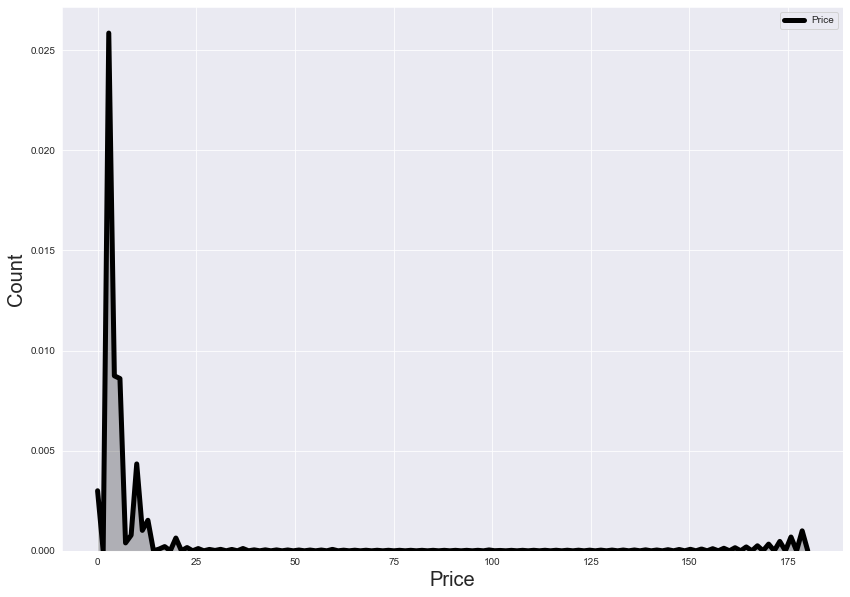

In [54]:
#variation of price vs number of that 
plt.rcParams['figure.figsize'] = (14, 10)
ax = sns.kdeplot(sub['Price'], shade = True, linewidth = 5, color = 'k')
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('Price', fontsize = 20)
plt.show()
#most of the games are under 10 dollar

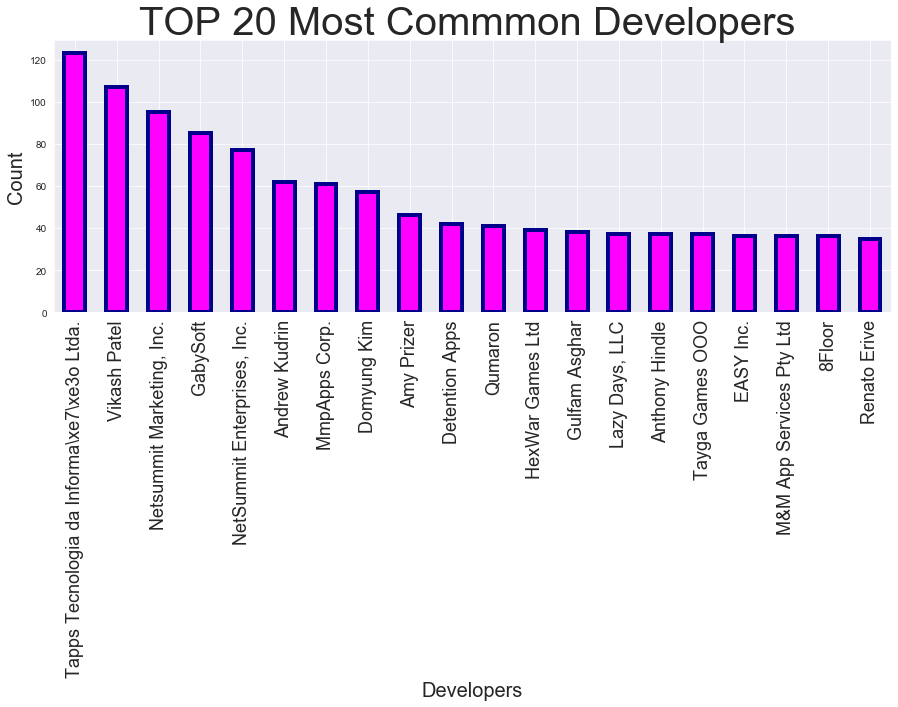

In [62]:
plt.rcParams['figure.figsize'] = (15, 5)
sub.Developer.value_counts()[:20].plot(kind='bar',color = 'magenta', alpha =1, linewidth=4, edgecolor='darkblue')
plt.xlabel("Developers", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("TOP 20 Most Commmon Developers ", fontsize=40)
plt.xticks(rotation=90, fontsize = 18) 
plt.show()


In [74]:
best = sub.sort_values(by=['Average User Rating', 'User Rating Count'], ascending=False)[['Name', 'Average User Rating', 'User Rating Count', 
                                                                                         'Price', 'Developer',]].head(10)
best.iloc[:]

,Name,Average User Rating,User Rating Count,Price,Developer
2223,"""Arizona Rose and the Pirates' Riddles HD""",5,994,0,Anawiki Games
1650,Bloons TD 5,5,97776,2.99,Ninja Kiwi
16163,Cooking Hot Cooking Games,5,9706,0,FlyBird Limited
5478,Gem Quest - Jewel Games Puzzle,5,969,0,Miik Limited
7453,Open Bar!,5,961,2.99,Gingear Studio Inc
186,King of Dragon Pass,5,960,9.99,"A Sharp, LLC"
11088,Angry Drunks,5,96,0,Angry Apps
13580,Skylanders\u2122 Ring of Heroes,5,9586,0,Com2uS Corp.
16360,Resurrection of Heroes,5,95,0,IGG.COM
16264,Chef Craze - Food Cooking Game,5,94,0,Lapusanu Patriciu


In [73]:
trend=sub.sort_values(by='Price',ascending=False)[['Name', 'Average User Rating','Price', 'User Rating Count', 'Size','Price']].head(10)
trend.iloc[:]

,Name,Average User Rating,Price,User Rating Count,Size,Price
4847,Arena Dodge,NaN,99.99,NaN,42868736,99.99
150,HIARCS Chess,4,9.99,213,22864896,9.99
11356,B Ball Opoly,NaN,9.99,NaN,166778880,9.99
10351,Broke - Opoly,NaN,9.99,NaN,169193472,9.99
11475,Carrier Deck,3.5,9.99,52,224008192,9.99
15513,Skyscraper Caper,NaN,9.99,NaN,89621504,9.99
6057,Atlantic Fleet,4.5,9.99,428,220282880,9.99
1306,Battle of the Bulge,4.5,9.99,1238,459378688,9.99
6033,Templar Battleforce Elite,5,9.99,147,157012992,9.99
12142,MapRace Creator,NaN,9.99,NaN,83347456,9.99


# Conclusions:-

# Most of the Games which are expensive are having no rating or fewer rating counts we must conclude one must see what will be the consequences before investing or developing any game. 

# Although Ninja Kiwi is not in top 20 developers but his developed game toped in rating as well as rating count so quality is always better than quantity

# one must develop game or any any other app on the basis of the population senerio like so take care of size ,because it also has many zero user rating may it is due to difficulty of download /internet problem 

# A lot of thanks for your consideration 